# PROBLEM STATEMENT

Build a model which help us to detect whether there is gearbox failure / not

by providing 

DATE & TIME , ACTIVE POWER , WIND SPEED , AMBIENT TEMPERATURE , GEARBOX TEMPERATURE , NACELLE TEMPERATURE , BEARING A TEMPERATURE , BEARING B TEMPERATURE , BEARING SHAFT TEMPERATURE AND TURBINE STATUS

# IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# READ THE DATA

In [2]:
data = pd.read_csv("JOA_XV_09.csv")

# 1ST 5 DATA

In [3]:
data.head()

,Date_Time,CGR_P_ACT,CGR_V_WIN,CGR_T_AMB,CGR_T_GEAR,CGR_T_NAC,CGR_T_BEAR_A,CGR_T_BEAR_B,CGR_T_BEAR_SHAFT,CGR_Toms_TurbineSt
0,2020-06-01 00:00:00.000,1589.787,9.516556,21.52639,62.97711,25.97256,49.29711,56.75478,39.07745,2.0
1,2020-06-01 00:10:00.000,1691.124,10.372060,21.47059,63.33847,26.13135,49.91741,57.45623,39.13159,2.0
2,2020-06-01 00:20:00.000,1673.912,10.004760,21.43047,63.64712,25.97029,50.09447,57.78230,39.17859,2.0
3,2020-06-01 00:30:00.000,1778.287,11.165500,21.36406,64.12450,25.95069,50.58556,58.41519,39.25225,2.0
4,2020-06-01 00:40:00.000,1788.220,10.555540,21.02215,64.49723,25.91500,51.39077,59.21008,39.22169,2.0


# CHANGING COLUMN DATATYPE

In [4]:
data['Date_Time'] = pd.to_datetime(data['Date_Time'])

# CREATE NEW COLUMN

In [5]:
data['year'] = data['Date_Time'].dt.year
data['month'] = data['Date_Time'].dt.month
data['day'] = data['Date_Time'].dt.day
data['hour'] = data['Date_Time'].dt.hour
data['minute'] = data['Date_Time'].dt.minute
data['second'] = data['Date_Time'].dt.second

In [6]:
data.head()

,Date_Time,CGR_P_ACT,CGR_V_WIN,CGR_T_AMB,CGR_T_GEAR,CGR_T_NAC,CGR_T_BEAR_A,CGR_T_BEAR_B,CGR_T_BEAR_SHAFT,CGR_Toms_TurbineSt,year,month,day,hour,minute,second
0,2020-06-01 00:00:00,1589.787,9.516556,21.52639,62.97711,25.97256,49.29711,56.75478,39.07745,2.0,2020,6,1,0,0,0
1,2020-06-01 00:10:00,1691.124,10.372060,21.47059,63.33847,26.13135,49.91741,57.45623,39.13159,2.0,2020,6,1,0,10,0
2,2020-06-01 00:20:00,1673.912,10.004760,21.43047,63.64712,25.97029,50.09447,57.78230,39.17859,2.0,2020,6,1,0,20,0
3,2020-06-01 00:30:00,1778.287,11.165500,21.36406,64.12450,25.95069,50.58556,58.41519,39.25225,2.0,2020,6,1,0,30,0
4,2020-06-01 00:40:00,1788.220,10.555540,21.02215,64.49723,25.91500,51.39077,59.21008,39.22169,2.0,2020,6,1,0,40,0


##### REMOVE DATE_TIME COLUMN

In [7]:
data.drop(columns=['Date_Time'], axis=1 , inplace = True)

In [8]:
data.head()

,CGR_P_ACT,CGR_V_WIN,CGR_T_AMB,CGR_T_GEAR,CGR_T_NAC,CGR_T_BEAR_A,CGR_T_BEAR_B,CGR_T_BEAR_SHAFT,CGR_Toms_TurbineSt,year,month,day,hour,minute,second
0,1589.787,9.516556,21.52639,62.97711,25.97256,49.29711,56.75478,39.07745,2.0,2020,6,1,0,0,0
1,1691.124,10.372060,21.47059,63.33847,26.13135,49.91741,57.45623,39.13159,2.0,2020,6,1,0,10,0
2,1673.912,10.004760,21.43047,63.64712,25.97029,50.09447,57.78230,39.17859,2.0,2020,6,1,0,20,0
3,1778.287,11.165500,21.36406,64.12450,25.95069,50.58556,58.41519,39.25225,2.0,2020,6,1,0,30,0
4,1788.220,10.555540,21.02215,64.49723,25.91500,51.39077,59.21008,39.22169,2.0,2020,6,1,0,40,0


# COLUMNS NAME

In [9]:
data.columns

Index(['CGR_P_ACT', 'CGR_V_WIN', 'CGR_T_AMB', 'CGR_T_GEAR', 'CGR_T_NAC',
       'CGR_T_BEAR_A', 'CGR_T_BEAR_B', 'CGR_T_BEAR_SHAFT',
       'CGR_Toms_TurbineSt', 'year', 'month', 'day', 'hour', 'minute',
       'second'],
      dtype='object')

CGR_P_ACT -> Active power generated by the turbine

CGR_V_WIN -> Wind speed

CGR_T_AMB -> Ambient Temperature

CGR_T_GEAR -> Gearbox temperature

CGR_T_NAC -> Nacelle Temperature

CGR_T_BEAR_A -> Bearing A Tempeerature

CGR_T_BEAR_B -> Bearing B Temperatue

CGR_T_BEAR_SHAFT -> Bearing Shaft Temperature

CGR_Toms_TurgbineSt -> Turbine Status (0: Stopped, 1: Wind not available, 2: Producing, 6: No Communication)

year -> Year

month -> Month

day -> Day

hour -> Hour

minute -> Minutes

second -> Seconds

# RENAMING THE COLUMNS

In [10]:
data.rename(columns = {'CGR_P_ACT':'active_power' , 'CGR_V_WIN':'wind_speed' , 'CGR_T_AMB':'ambient_temp' , 'CGR_T_GEAR':'gearbox_temp' , 'CGR_T_NAC':'nacelle_temp' , 'CGR_T_BEAR_A':'bearing_a_temp' , 'CGR_T_BEAR_B':'bearing_b_temp' , 'CGR_T_BEAR_SHAFT':'bearing_shaft_temp' , 'CGR_Toms_TurbineSt':'turbine_status'},inplace = True)

In [11]:
data.columns

Index(['active_power', 'wind_speed', 'ambient_temp', 'gearbox_temp',
       'nacelle_temp', 'bearing_a_temp', 'bearing_b_temp',
       'bearing_shaft_temp', 'turbine_status', 'year', 'month', 'day', 'hour',
       'minute', 'second'],
      dtype='object')

# CHECKING NULL VALUES

In [12]:
data.isnull().sum()

active_power           213
wind_speed             213
ambient_temp           213
gearbox_temp           213
nacelle_temp           213
bearing_a_temp         213
bearing_b_temp         213
bearing_shaft_temp     213
turbine_status        4861
year                     0
month                    0
day                      0
hour                     0
minute                   0
second                   0
dtype: int64

In [13]:
data.dropna(inplace = True)

In [14]:
data.isnull().sum()

active_power          0
wind_speed            0
ambient_temp          0
gearbox_temp          0
nacelle_temp          0
bearing_a_temp        0
bearing_b_temp        0
bearing_shaft_temp    0
turbine_status        0
year                  0
month                 0
day                   0
hour                  0
minute                0
second                0
dtype: int64

# ROWS & COLUMNS

In [15]:
data.shape

(25525, 15)

# COLUMN DATA-TYPE

In [16]:
data.dtypes

active_power          float64
wind_speed            float64
ambient_temp          float64
gearbox_temp          float64
nacelle_temp          float64
bearing_a_temp        float64
bearing_b_temp        float64
bearing_shaft_temp    float64
turbine_status        float64
year                    int64
month                   int64
day                     int64
hour                    int64
minute                  int64
second                  int64
dtype: object

# OUTLIERS

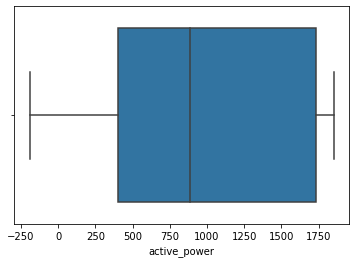

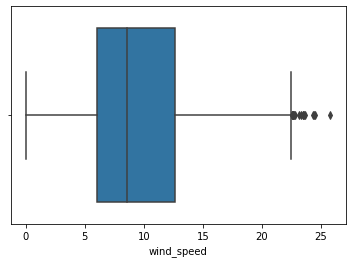

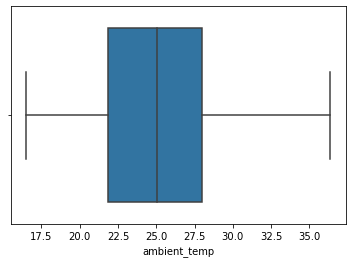

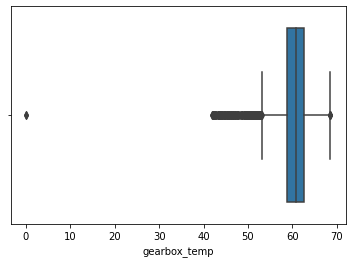

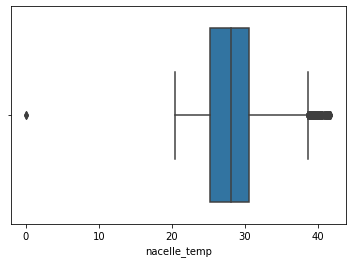

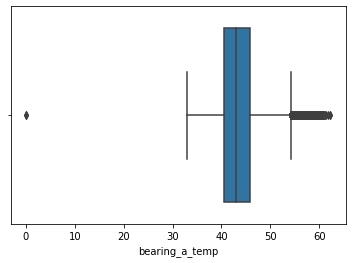

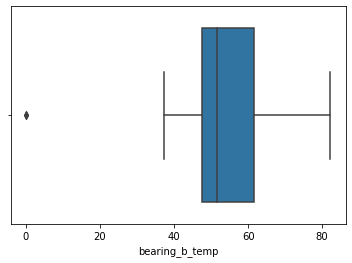

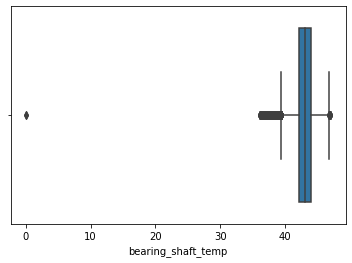

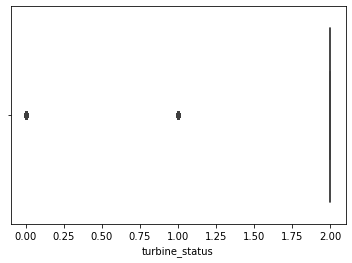

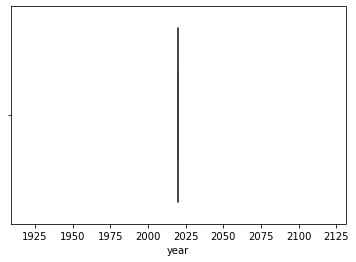

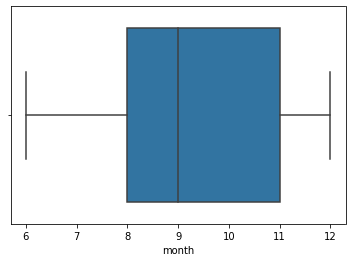

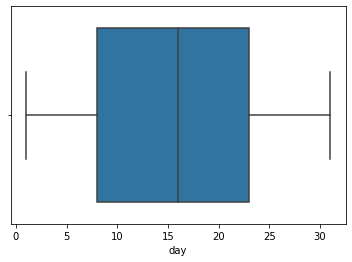

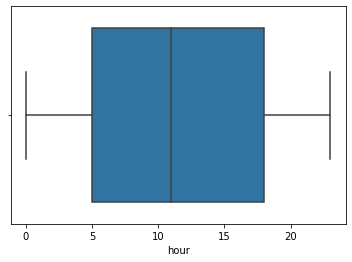

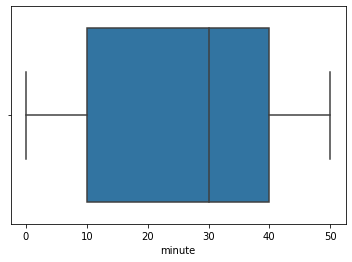

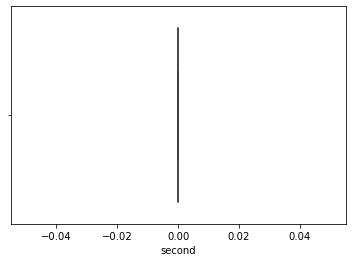

In [17]:
column = ['active_power', 'wind_speed', 'ambient_temp', 'gearbox_temp', 'nacelle_temp', 'bearing_a_temp', 'bearing_b_temp', 'bearing_shaft_temp', 'turbine_status' , 
         'year', 'month', 'day', 'hour', 'minute', 'second']

for i in column:
    sns.boxplot(data = data , x = i)
    plt.show()

WE DON'T HAVE OUTLIERS IN THESE COLUMNS : ACTIVE POWER , AMBIENT TEMPERATURE , TURBINE STATUS

WE HAVE OUTLIERS IN THESE COLUMNS : WIND SPEED , NACELLE TEMPERATURE , GEARBOX TEMPERATURE , BEARING A TEMPERATURE , BEARING B TEMPERATURE , BEARING SHAFT TEMPERATURE

In [18]:
def outli(data , mean , std , thres):
    
    out = []
    
    for j in data:
        z = (j - mean) / std
        
        if z>thres:
            out.append(j)
    
    return out
    

In [19]:
data1 = data['wind_speed']
mean1 = np.mean(data1)
std1 = np.std(data1)

outliera = outli(data1 , mean1 , std1 , 2)

In [20]:
outliera

[19.851,
 21.3016,
 18.5455,
 21.366,
 21.3935,
 20.14583,
 19.12933,
 20.2875,
 19.94517,
 20.161,
 18.5166,
 19.46157,
 20.03783,
 18.667,
 18.33567,
 18.78456,
 18.60967,
 19.97775,
 19.123,
 18.7346,
 18.3498,
 19.7084,
 19.5932,
 18.4974,
 19.379,
 20.342,
 18.8516,
 19.03367,
 18.4604,
 21.2856,
 20.2856,
 19.8575,
 19.0812,
 20.4866,
 18.4272,
 18.3858,
 19.375,
 22.678,
 18.4162,
 18.654,
 19.0755,
 18.3635,
 18.447,
 18.95071,
 20.907,
 19.18586,
 20.30286,
 21.4785,
 23.57875,
 19.56971,
 19.43867,
 19.6502,
 18.37157,
 18.73325,
 19.90343,
 18.351,
 20.2542,
 21.1766,
 19.19683,
 18.538,
 18.641,
 18.6878,
 18.6645,
 20.65733,
 19.48433,
 19.2855,
 19.361,
 18.62733,
 18.7584,
 20.59817,
 20.9324,
 19.88383,
 18.965,
 20.3675,
 19.2286,
 20.72817,
 20.44883,
 19.7726,
 19.01075,
 20.695,
 18.53967,
 19.1922,
 19.3908,
 22.43383,
 21.3655,
 20.05183,
 20.43167,
 19.78175,
 18.9532,
 19.17975,
 18.73425,
 19.06033,
 19.81017,
 20.90833,
 20.5684,
 21.7296,
 20.34875,
 19.765,


In [21]:
for z in outliera:
    data.drop(data[data['wind_speed'] == z].index, inplace = True)

In [22]:
data3 = data['nacelle_temp']
mean3 = np.mean(data3)
std3 = np.std(data3)

outlierb = outli(data3 , mean3 , std3 , 2)

In [23]:
outlierb

[35.727,
 35.97916,
 36.44506,
 36.59704,
 36.7438,
 36.8915,
 35.56674,
 35.8412,
 35.98633,
 36.09917,
 36.3906,
 36.6902,
 36.4225,
 36.6502,
 36.8055,
 36.8904,
 36.98267,
 37.0522,
 37.199,
 37.27367,
 37.44,
 37.663,
 37.735,
 37.89034,
 37.9944,
 37.9396,
 37.8112,
 37.8322,
 37.89217,
 37.7844,
 37.8326,
 37.8552,
 37.203,
 37.18857,
 36.03457,
 36.4498,
 37.4598,
 38.2884,
 38.80575,
 38.961,
 38.87775,
 39.0292,
 37.622,
 36.283,
 37.73525,
 35.71967,
 35.65933,
 35.76133,
 36.20525,
 36.10867,
 35.5695,
 36.884,
 37.942,
 38.175,
 36.185,
 35.825,
 38.20625,
 39.08625,
 37.96367,
 35.962,
 35.58533,
 36.26167,
 36.1395,
 38.869,
 39.92033,
 40.632,
 40.984,
 41.15533,
 41.24533,
 41.277,
 41.37633,
 41.1125,
 41.14567,
 41.011,
 40.91967,
 40.57067,
 40.4414,
 40.27033,
 40.2475,
 36.25189,
 35.52867,
 35.80967,
 36.03534,
 36.3986,
 36.96133,
 37.06833,
 35.8045,
 35.592,
 35.718,
 35.614,
 35.567,
 35.971,
 35.81733,
 36.4855,
 36.06233,
 35.965,
 35.945,
 36.13267,
 36.34

In [24]:
for n in outlierb:
    data.drop(data[data['nacelle_temp'] == n].index, inplace = True)

In [25]:
data4 = data['bearing_a_temp']
mean4 = np.mean(data4)
std4 = np.std(data4)

outlierc = outli(data4 , mean4 , std4 , 2)

In [26]:
outlierc

[53.91654,
 54.58431,
 54.91383,
 54.92056,
 54.76531,
 54.66224,
 55.12313,
 55.23714,
 55.1563,
 54.707,
 54.10339,
 53.91557,
 54.40042,
 54.18457,
 53.90936,
 55.7504,
 56.0434,
 56.5008,
 56.756,
 56.6635,
 57.0876,
 57.1248,
 56.9756,
 56.81175,
 56.6435,
 56.4265,
 56.3728,
 56.256,
 56.5126,
 56.28485,
 56.0368,
 55.6542,
 55.75,
 55.451,
 55.88917,
 56.3286,
 56.4375,
 56.12943,
 56.25671,
 56.645,
 56.3896,
 56.56116,
 56.6682,
 56.8164,
 56.6455,
 56.42216,
 56.56783,
 56.2295,
 56.0435,
 56.12783,
 55.8166,
 55.8862,
 55.5554,
 55.27483,
 55.1032,
 55.07357,
 54.51883,
 54.30667,
 54.54143,
 54.33843,
 54.2902,
 53.814,
 54.8802,
 55.76967,
 56.5815,
 57.2422,
 57.835,
 57.88055,
 58.46371,
 58.306,
 58.17725,
 58.65933,
 58.4591,
 58.42475,
 58.26543,
 58.2631,
 58.19873,
 58.09622,
 57.95156,
 57.96057,
 57.39386,
 57.33089,
 56.9726,
 56.927,
 56.473,
 56.42586,
 56.21822,
 55.892,
 55.5142,
 55.59037,
 55.04671,
 54.8854,
 54.8487,
 54.05944,
 53.81087,
 54.97978,
 55.3

In [27]:
for b in outlierc:
    data.drop(data[data['bearing_a_temp'] == b].index, inplace = True)

In [28]:
data5 = data['bearing_b_temp']
mean5 = np.mean(data5)
std5 = np.std(data5)

outlierd = outli(data5 , mean5 , std5 , 2)

In [29]:
outlierd

[72.41043,
 71.65012,
 71.33043,
 71.416,
 70.753,
 70.42045,
 69.56467,
 70.69725,
 72.40557,
 73.69633,
 74.3534,
 74.401,
 74.26875,
 73.72814,
 73.05116,
 72.60966,
 71.69086,
 70.557,
 69.4815,
 70.36967,
 70.8484,
 71.10911,
 72.81384,
 73.7214,
 74.167,
 74.64034,
 75.3532,
 76.0584,
 76.21367,
 75.8284,
 75.4718,
 74.7796,
 74.63683,
 74.2012,
 73.54533,
 73.4125,
 72.8672,
 73.02167,
 72.5175,
 72.0398,
 73.05033,
 73.96667,
 74.34133,
 73.4758,
 72.94733,
 72.39783,
 72.2835,
 72.36667,
 71.97266,
 72.0695,
 71.65467,
 71.22667,
 71.34883,
 70.90883,
 71.20184,
 70.26133,
 71.31183,
 71.2695,
 71.14467,
 70.77216,
 70.73617,
 70.22083,
 70.28667,
 69.51767,
 69.54485,
 69.219,
 69.4915,
 70.8545,
 72.15183,
 72.17767,
 71.9508,
 72.05867,
 72.37983,
 72.36083,
 72.348,
 72.14757,
 72.21017,
 72.5252,
 73.4438,
 73.8785,
 73.818,
 73.49633,
 73.97,
 73.564,
 73.48929,
 73.44383,
 72.64034,
 72.02014,
 71.71616,
 71.1696,
 70.94728,
 70.121,
 69.8375,
 69.39257,
 70.1195,
 70.5

In [30]:
for t in outlierd:
    data.drop(data[data['bearing_b_temp'] == t].index, inplace = True)

In [31]:
data6 = data['bearing_shaft_temp']
mean6 = np.mean(data6)
std6 = np.std(data6)

outliere = outli(data6 , mean6 , std6 , 2)

In [32]:
outliere

[46.03767,
 46.18225,
 46.25933,
 46.218,
 46.1635,
 46.146,
 46.14167,
 46.11133,
 46.065,
 46.114,
 46.0425,
 46.02733,
 46.012,
 46.015,
 46.14775,
 46.19433,
 46.28733,
 45.994,
 46.0375,
 46.08675,
 46.153,
 46.152,
 46.23467,
 46.27025,
 46.29167,
 46.22575,
 46.11025,
 46.0,
 46.002,
 46.0215,
 46.00467,
 45.99175,
 46.319,
 46.304,
 46.273,
 46.2215,
 46.1895,
 46.15367,
 46.0955,
 46.04033,
 46.01733,
 46.004,
 46.0035,
 46.01572,
 46.12771,
 46.1075,
 46.0525,
 46.00744,
 45.9915,
 46.167,
 46.11622,
 46.07388]

In [33]:
for bst in outliere:
    data.drop(data[data['bearing_shaft_temp'] == bst].index, inplace = True)

In [34]:
data7 = data['gearbox_temp']
mean7 = np.mean(data7)
std7 = np.std(data7)

outlierf = outli(data7 , mean7 , std7 , 2)

In [35]:
outlierf

[65.962,
 65.9086,
 66.082,
 65.9564,
 66.00616,
 65.929,
 65.9708,
 66.046,
 65.9842,
 65.88966,
 66.069,
 65.84883,
 66.02067,
 65.88175,
 66.11867,
 66.11367,
 65.91675,
 66.006,
 65.89433,
 65.8655,
 65.8905,
 65.95525,
 65.85467,
 65.937,
 66.015,
 65.999,
 65.873,
 65.992,
 65.889,
 66.03233,
 66.2175,
 66.3205,
 66.36275,
 66.49467,
 66.58925,
 66.653,
 66.534,
 66.78867,
 66.783,
 66.66325,
 66.825,
 66.71075,
 66.72467,
 66.695,
 66.475,
 66.2885,
 66.3285,
 66.38825,
 66.23833,
 66.19033,
 66.07325,
 65.946,
 65.8545,
 65.84666,
 65.87967,
 65.91425,
 65.918,
 66.01467,
 66.00025,
 66.182,
 66.32175,
 66.22176,
 66.565,
 66.49575,
 66.4345,
 66.524,
 66.5138,
 66.69325,
 66.56475,
 66.66475,
 66.57425,
 66.36875,
 66.725,
 66.27425,
 66.44675,
 65.999,
 66.3195,
 65.88525,
 65.91575,
 66.12466,
 66.355,
 66.439,
 66.4155,
 66.56067,
 66.87766,
 66.00933,
 66.15067,
 66.52367,
 66.73825,
 66.96266,
 67.20825,
 66.21325,
 66.42533,
 66.42767,
 65.95467,
 66.30167,
 66.41375,
 6

In [36]:
for gt in outlierf:
    data.drop(data[data['gearbox_temp'] == gt].index, inplace = True)

In [37]:
data.shape

(21482, 15)

# WHICH YEAR HAS RECORDED HIGHEST GEARBOX TEMP

In [38]:
max_gear_box_temp = np.max(data['gearbox_temp'])

data[data['gearbox_temp']==max_gear_box_temp]

,active_power,wind_speed,ambient_temp,gearbox_temp,nacelle_temp,bearing_a_temp,bearing_b_temp,bearing_shaft_temp,turbine_status,year,month,day,hour,minute,second
12934,1786.098,11.0192,25.3304,65.8402,29.1802,48.9832,64.6574,45.6094,2.0,2020,8,29,21,50,0


# WHICH YEAR HAS RECORDED LOWEST GEARBOX TEMP

In [39]:
min_gear_box_temp = np.min(data['gearbox_temp'])

data[data['gearbox_temp'] == min_gear_box_temp]

,active_power,wind_speed,ambient_temp,gearbox_temp,nacelle_temp,bearing_a_temp,bearing_b_temp,bearing_shaft_temp,turbine_status,year,month,day,hour,minute,second
21300,0.000,0.0,23.975,0.0,0.0,0.0,0.0,0.0,0.0,2020,10,27,9,30,0
28811,-2.863,0.0,28.785,0.0,0.0,0.0,0.0,0.0,0.0,2020,12,18,13,50,0


# WHICH YEAR HAS RECORDED HIGHEST NACELLE TEMP

In [40]:
max_nacelle_temp = np.max(data['nacelle_temp'])

data[data['nacelle_temp']==max_nacelle_temp]

,active_power,wind_speed,ambient_temp,gearbox_temp,nacelle_temp,bearing_a_temp,bearing_b_temp,bearing_shaft_temp,turbine_status,year,month,day,hour,minute,second
18907,180.8025,4.35975,33.64025,61.08325,35.498,42.74125,47.86075,43.33375,2.0,2020,10,10,16,30,0


# WHICH YEAR HAS RECORDED LOWEST NACELLE TEMP

In [41]:
min_nacelle_temp = np.min(data['nacelle_temp'])

data[data['nacelle_temp'] == min_nacelle_temp]

,active_power,wind_speed,ambient_temp,gearbox_temp,nacelle_temp,bearing_a_temp,bearing_b_temp,bearing_shaft_temp,turbine_status,year,month,day,hour,minute,second
21300,0.000,0.0,23.975,0.0,0.0,0.0,0.0,0.0,0.0,2020,10,27,9,30,0
28811,-2.863,0.0,28.785,0.0,0.0,0.0,0.0,0.0,0.0,2020,12,18,13,50,0


# WHICH YEAR HAS RECORDED HIGHEST AMBIENT TEMP

In [42]:
max_ambient_temp = np.max(data['ambient_temp'])

data[data['ambient_temp']==max_ambient_temp]

,active_power,wind_speed,ambient_temp,gearbox_temp,nacelle_temp,bearing_a_temp,bearing_b_temp,bearing_shaft_temp,turbine_status,year,month,day,hour,minute,second
24055,96.72833,3.249667,35.022,56.675,35.14933,43.68033,49.75967,43.837,2.0,2020,11,15,13,10,0


# WHICH YEAR HAS RECORDED LOWEST AMBIENT TEMP

In [43]:
min_ambient_temp = np.min(data['ambient_temp'])

data[data['ambient_temp']==min_ambient_temp]

,active_power,wind_speed,ambient_temp,gearbox_temp,nacelle_temp,bearing_a_temp,bearing_b_temp,bearing_shaft_temp,turbine_status,year,month,day,hour,minute,second
10256,1599.556,10.453,16.486,63.56375,21.385,45.68675,53.842,42.707,2.0,2020,8,11,5,30,0


# WHICH YEAR HAS RECORDED HIGHEST WIND SPEED

In [44]:
max_wind_speed = np.max(data['wind_speed'])

data[data['wind_speed']==max_wind_speed]

,active_power,wind_speed,ambient_temp,gearbox_temp,nacelle_temp,bearing_a_temp,bearing_b_temp,bearing_shaft_temp,turbine_status,year,month,day,hour,minute,second
7828,1755.383,18.28533,19.43683,59.68717,22.89467,42.58167,62.93533,42.37133,2.0,2020,7,25,8,40,0


# WHICH YEAR HAS RECORDED LOWEST WIND SPEED 

In [45]:
min_wind_speed = np.min(data['wind_speed'])

data[data['wind_speed']==min_wind_speed]

,active_power,wind_speed,ambient_temp,gearbox_temp,nacelle_temp,bearing_a_temp,bearing_b_temp,bearing_shaft_temp,turbine_status,year,month,day,hour,minute,second
19032,-8.823667,0.0,32.83167,59.57734,34.0140,39.91633,43.9670,42.14967,1.0,2020,10,11,13,20,0
21300,0.000000,0.0,23.97500,0.00000,0.0000,0.00000,0.0000,0.00000,0.0,2020,10,27,9,30,0
21495,-10.285000,0.0,28.29500,58.47400,31.1120,43.62100,47.5470,42.25900,1.0,2020,10,28,18,0,0
22469,-8.746000,0.0,21.16850,56.72700,25.1640,35.57500,41.7885,39.00100,1.0,2020,11,4,12,20,0
22476,-5.317500,0.0,21.92850,53.01600,31.6030,34.52850,38.7180,37.38650,1.0,2020,11,4,13,30,0
24243,-5.381500,0.0,28.38950,54.78200,34.0075,39.51950,44.7710,42.50700,1.0,2020,11,16,20,30,0
24647,-8.973000,0.0,20.76800,56.98100,26.5280,37.12400,42.9700,40.10600,1.0,2020,11,19,15,50,0
27549,-4.538000,0.0,28.21350,56.63850,33.4880,40.44100,49.5475,41.39750,1.0,2020,12,9,19,30,0
28558,-8.006001,0.0,26.58733,56.50967,30.3920,39.18867,45.4720,42.19300,1.0,2020,12,16,19,40,0
28811,-2.863000,0.0,28.78500,0.00000,0.0000,0.00000,0.0000,0.00000,0.0,2020,12,18,13,50,0


# WHICH YEAR HAS RECORDED HIGHEST ACTIVE POWER BY TURBINE

In [46]:
max_active_power = np.max(data['active_power'])

data[data['active_power']==max_active_power]

,active_power,wind_speed,ambient_temp,gearbox_temp,nacelle_temp,bearing_a_temp,bearing_b_temp,bearing_shaft_temp,turbine_status,year,month,day,hour,minute,second
15305,1846.869,15.32467,23.643,65.15133,26.07267,46.28933,63.71033,43.80933,2.0,2020,9,15,9,50,0


# WHICH YEAR HAS RECORDED LOWEST ACTIVE POWER BY TURBINE

In [47]:
min_active_power = np.min(data['active_power'])

data[data['active_power']==min_active_power]

,active_power,wind_speed,ambient_temp,gearbox_temp,nacelle_temp,bearing_a_temp,bearing_b_temp,bearing_shaft_temp,turbine_status,year,month,day,hour,minute,second
21444,-26.934,2.428,27.516,58.763,28.637,36.708,42.193,40.049,2.0,2020,10,28,9,30,0


# WHICH YEAR TURBINE STATUS WAS RECORDED AS - STOPPED

In [48]:
status_1 = 0

data[data['turbine_status']==status_1]

,active_power,wind_speed,ambient_temp,gearbox_temp,nacelle_temp,bearing_a_temp,bearing_b_temp,bearing_shaft_temp,turbine_status,year,month,day,hour,minute,second
8154,0.000000,9.320500,28.48220,56.37670,33.33880,44.04090,58.40880,42.37010,0.0,2020,7,27,15,0,0
8155,0.000000,8.418782,27.80287,55.18118,35.37726,44.37204,57.93143,41.91970,0.0,2020,7,27,15,10,0
8564,-8.636833,13.137000,24.19483,58.65233,28.61283,49.29017,64.56633,42.36250,0.0,2020,7,30,11,20,0
8565,-7.029600,14.304000,24.65320,55.89460,31.17920,50.16600,64.41740,41.60420,0.0,2020,7,30,11,30,0
8566,-5.722600,8.126600,25.27320,55.70760,33.60680,50.39680,63.94160,41.09740,0.0,2020,7,30,11,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29368,-3.449500,5.861000,26.08850,49.15400,33.45200,36.77000,38.29350,37.48950,0.0,2020,12,22,11,0,0
29369,-3.568000,6.891000,26.55150,48.31450,32.85750,36.81650,38.17550,37.37950,0.0,2020,12,22,11,10,0
29370,-2.759667,6.799000,26.65467,47.42633,32.91967,36.84000,38.09134,37.26067,0.0,2020,12,22,11,20,0
29371,-2.355000,4.465667,27.54233,46.65367,32.92100,36.87800,38.00700,37.16833,0.0,2020,12,22,11,30,0


# WHICH YEAR TURBINE STATUS WAS RECORDED AS - WIND NOT AVAILABLE

In [49]:
status_2 = 1

data[data['turbine_status']==status_2]

,active_power,wind_speed,ambient_temp,gearbox_temp,nacelle_temp,bearing_a_temp,bearing_b_temp,bearing_shaft_temp,turbine_status,year,month,day,hour,minute,second
4536,-7.556428,3.738286,29.56371,56.20857,31.92614,40.53072,49.39043,41.95971,1.0,2020,7,2,12,0,0
4538,4.932571,3.203143,29.76814,56.21686,31.10286,40.75671,49.60429,42.00086,1.0,2020,7,2,12,20,0
4539,-10.611750,3.343750,29.94675,56.97025,31.18800,40.63675,49.01775,41.95975,1.0,2020,7,2,12,30,0
4543,4.651429,3.337286,30.10714,58.51657,33.87057,40.01357,47.46986,41.99243,1.0,2020,7,2,13,10,0
4544,-10.348000,4.514000,29.84380,58.94200,32.62820,40.38660,47.53960,42.07200,1.0,2020,7,2,13,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29948,-7.286000,3.749000,30.93800,57.88500,31.47100,39.84500,45.66300,40.60400,1.0,2020,12,26,11,40,0
29952,-11.582500,4.124500,29.43450,56.86400,30.64000,39.83100,46.00100,40.70500,1.0,2020,12,26,12,20,0
30088,-11.742000,7.165000,28.90050,58.87650,30.61250,42.46950,56.60650,42.60050,1.0,2020,12,27,11,0,0
30242,-10.129000,4.969000,28.61900,60.22800,30.11900,43.28300,52.15000,42.25900,1.0,2020,12,28,12,40,0


# WHICH YEAR TURBINE STATUS WAS RECORDED AS - PRODUCING

In [50]:
status_3 = 2

data[data['turbine_status']==status_3]

,active_power,wind_speed,ambient_temp,gearbox_temp,nacelle_temp,bearing_a_temp,bearing_b_temp,bearing_shaft_temp,turbine_status,year,month,day,hour,minute,second
0,1589.7870,9.516556,21.52639,62.97711,25.97256,49.29711,56.75478,39.07745,2.0,2020,6,1,0,0,0
1,1691.1240,10.372060,21.47059,63.33847,26.13135,49.91741,57.45623,39.13159,2.0,2020,6,1,0,10,0
2,1673.9120,10.004760,21.43047,63.64712,25.97029,50.09447,57.78230,39.17859,2.0,2020,6,1,0,20,0
3,1778.2870,11.165500,21.36406,64.12450,25.95069,50.58556,58.41519,39.25225,2.0,2020,6,1,0,30,0
4,1788.2200,10.555540,21.02215,64.49723,25.91500,51.39077,59.21008,39.22169,2.0,2020,6,1,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30594,893.8730,8.373000,26.76100,62.20900,29.91400,47.10100,50.88500,43.80500,2.0,2020,12,30,23,20,0
30595,929.4365,8.999500,26.95900,61.91850,29.66000,46.77600,50.93000,43.83300,2.0,2020,12,30,23,30,0
30596,723.9480,7.574000,26.86000,61.76250,29.75350,47.15200,51.02150,43.78850,2.0,2020,12,30,23,40,0
30597,914.3980,7.811000,26.92750,61.92800,29.65700,46.29050,50.85900,43.81300,2.0,2020,12,30,23,50,0


# WHICH YEAR TURBINE STATUS WAS RECORDED AS - NO COMMUNICATION

In [51]:
status_4 = 6

data[data['turbine_status']==status_4]

,active_power,wind_speed,ambient_temp,gearbox_temp,nacelle_temp,bearing_a_temp,bearing_b_temp,bearing_shaft_temp,turbine_status,year,month,day,hour,minute,second


# WHICH YEAR HAS RECORDED HIGHEST BEARING A TEMP

In [52]:
max_bearing_a_temp = np.max(data['bearing_a_temp'])

data[data['bearing_a_temp']==max_bearing_a_temp]

,active_power,wind_speed,ambient_temp,gearbox_temp,nacelle_temp,bearing_a_temp,bearing_b_temp,bearing_shaft_temp,turbine_status,year,month,day,hour,minute,second
8373,1788.636,13.7548,19.19,60.4076,23.6344,53.682,68.8098,43.6768,2.0,2020,7,29,3,30,0


# WHICH YEAR HAS RECORDED LOWEST BEARING A TEMP

In [53]:
min_bearing_a_temp = np.min(data['bearing_a_temp'])

data[data['bearing_a_temp']==min_bearing_a_temp]

,active_power,wind_speed,ambient_temp,gearbox_temp,nacelle_temp,bearing_a_temp,bearing_b_temp,bearing_shaft_temp,turbine_status,year,month,day,hour,minute,second
21300,0.000,0.0,23.975,0.0,0.0,0.0,0.0,0.0,0.0,2020,10,27,9,30,0
28811,-2.863,0.0,28.785,0.0,0.0,0.0,0.0,0.0,0.0,2020,12,18,13,50,0


# WHICH YEAR HAS RECORDED HIGHEST BEARING B TEMP

In [54]:
max_bearing_b_temp = np.max(data['bearing_b_temp'])

data[data['bearing_b_temp']==max_bearing_b_temp]

,active_power,wind_speed,ambient_temp,gearbox_temp,nacelle_temp,bearing_a_temp,bearing_b_temp,bearing_shaft_temp,turbine_status,year,month,day,hour,minute,second
8398,1775.201,14.7162,20.0006,60.9146,23.5824,52.7206,69.1536,43.1468,2.0,2020,7,29,7,40,0


# WHICH YEAR HAS RECORDED LOWEST BEARING B TEMP

In [55]:
min_bearing_b_temp = np.min(data['bearing_b_temp'])

data[data['bearing_b_temp']==min_bearing_b_temp]

,active_power,wind_speed,ambient_temp,gearbox_temp,nacelle_temp,bearing_a_temp,bearing_b_temp,bearing_shaft_temp,turbine_status,year,month,day,hour,minute,second
21300,0.000,0.0,23.975,0.0,0.0,0.0,0.0,0.0,0.0,2020,10,27,9,30,0
28811,-2.863,0.0,28.785,0.0,0.0,0.0,0.0,0.0,0.0,2020,12,18,13,50,0


# CORRELATION

<AxesSubplot:>

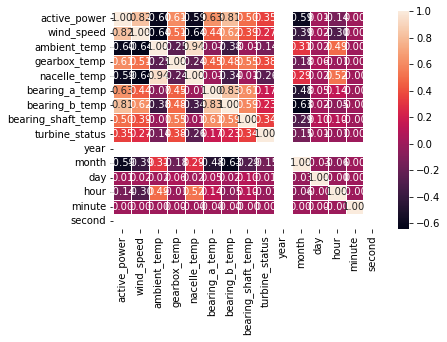

In [56]:
sns.heatmap(data.corr() , annot = True , linewidths = 1 , fmt = '0.2f')

In [57]:
data.corr()

,active_power,wind_speed,ambient_temp,gearbox_temp,nacelle_temp,bearing_a_temp,bearing_b_temp,bearing_shaft_temp,turbine_status,year,month,day,hour,minute,second
active_power,1.000000,0.824724,-0.604271,0.608750,-0.586971,0.629055,0.809336,0.497133,0.349382,NaN,-0.594808,0.014410,-0.140495,0.000413,NaN
wind_speed,0.824724,1.000000,-0.641870,0.511172,-0.641235,0.437354,0.620241,0.394794,0.270178,NaN,-0.387676,0.020614,-0.297049,0.002602,NaN
ambient_temp,-0.604271,-0.641870,1.000000,-0.254974,0.939244,-0.067758,-0.376559,-0.011256,-0.138554,NaN,0.308791,0.017255,0.487994,0.000267,NaN
gearbox_temp,0.608750,0.511172,-0.254974,1.000000,-0.237572,0.454147,0.484479,0.546595,0.378107,NaN,-0.179954,0.061156,-0.008608,0.001298,NaN
nacelle_temp,-0.586971,-0.641235,0.939244,-0.237572,1.000000,-0.005553,-0.337852,0.008803,-0.255874,NaN,0.287697,0.015086,0.523622,-0.000346,NaN
bearing_a_temp,0.629055,0.437354,-0.067758,0.454147,-0.005553,1.000000,0.832608,0.609165,0.169324,NaN,-0.476172,0.054880,0.137368,-0.001268,NaN
bearing_b_temp,0.809336,0.620241,-0.376559,0.484479,-0.337852,0.832608,1.000000,0.591197,0.227200,NaN,-0.633140,0.017711,-0.054624,-0.003123,NaN
bearing_shaft_temp,0.497133,0.394794,-0.011256,0.546595,0.008803,0.609165,0.591197,1.000000,0.344244,NaN,-0.293022,0.096736,0.096142,-0.000179,NaN
turbine_status,0.349382,0.270178,-0.138554,0.378107,-0.255874,0.169324,0.227200,0.344244,1.000000,NaN,-0.146814,0.013651,-0.014309,0.002491,NaN
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1) GEARBOX TEMPERATURE IS POSITIVELY CORRELATED WITH ACTIVE POWER , WIND SPEED , BEARING A TEMP , BEARING B TEMP , BEARING SHAFT TEMP , DAY AND MINUTES

2) GEARBOX TEMPERATURE IS NEGATIVELY CORRELATED WITH AMBIENT TEMP , NACELLE TEMP , MONTH AND HOUR

3) GEARBOX TEMPERATURE IS NOT CORRELATED WITH YEAR AND SECONDS

In [58]:
df = data.copy()

In [59]:
df.columns

Index(['active_power', 'wind_speed', 'ambient_temp', 'gearbox_temp',
       'nacelle_temp', 'bearing_a_temp', 'bearing_b_temp',
       'bearing_shaft_temp', 'turbine_status', 'year', 'month', 'day', 'hour',
       'minute', 'second'],
      dtype='object')

## TURBINE STATUS

<AxesSubplot:xlabel='turbine_status', ylabel='count'>

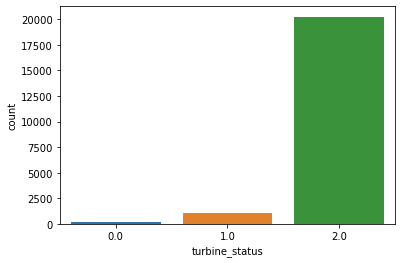

In [60]:
sns.countplot(data = data , x = "turbine_status")

In [61]:
data['turbine_status'].value_counts()

2.0    20249
1.0     1070
0.0      163
Name: turbine_status, dtype: int64

#### So now we will be building a model and with the help of that we will detect whether there is any Gearbox Failure / Not

# MODEL BUILDING

#### NECESSARY LIBRARIES

In [62]:
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#### PREDICTION FUNCTION

In [63]:
def predi(model , v1 , v2 , v3 , v4 , v5 , v6 , v7 , v8 , v9 , v10 , v11 , v12 , v13 , v14 , v15):
    
    return model.predict([[v1 , v2 , v3 , v4 , v5 , v6 , v7 , v8 , v9 , v10 , v11 , v12 , v13 , v14 , v15]])

In [64]:
def predi1(model , data , range1 , rang2):
    
    return model.predict(data[range1:range2])

In [65]:
data.head(2)

,active_power,wind_speed,ambient_temp,gearbox_temp,nacelle_temp,bearing_a_temp,bearing_b_temp,bearing_shaft_temp,turbine_status,year,month,day,hour,minute,second
0,1589.787,9.516556,21.52639,62.97711,25.97256,49.29711,56.75478,39.07745,2.0,2020,6,1,0,0,0
1,1691.124,10.372060,21.47059,63.33847,26.13135,49.91741,57.45623,39.13159,2.0,2020,6,1,0,10,0


##### THRESHOLD VALUE FOR GEARBOX TEMPERATURE

In [66]:
gearbox_temperatures = data['gearbox_temp']

In [67]:
Q1 = np.percentile(gearbox_temperatures, 25)
Q3 = np.percentile(gearbox_temperatures, 75)
IQR = Q3 - Q1

In [68]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [69]:
threshold = upper_bound

In [70]:
print("Gearbox Temperature Threshold:", threshold)

Gearbox Temperature Threshold: 67.79286


##### THRESHOLD VALUE FOR ACTIVE POWER

In [71]:
active_power = data['active_power']

In [72]:
qap1 = np.percentile(active_power , 25)
qap2 = np.percentile(active_power , 75)
iqrap = qap2 - qap1

In [73]:
lower_boundap = qap1 - 1.5 * iqrap
upper_boundap = qap2 + 1.5 * iqrap

In [74]:
thresholdap = upper_boundap

In [75]:
print("Active Power Threshold:", thresholdap)

Active Power Threshold: 2826.3588124999997


##### THRESHOLD VALUE FOR WIND SPEED

In [76]:
wind_speed = data['wind_speed']

In [77]:
qws1 = np.percentile(wind_speed , 25)
qws2 = np.percentile(wind_speed , 75)
iqrws = qws2 - qws1

In [78]:
lower_boundws = qws1 - 1.5 * iqrws
upper_boundws = qws2 + 1.5 * iqrws

In [79]:
thresholdws = upper_boundws

In [80]:
print("Wind Speed Threshold:", thresholdws)

Wind Speed Threshold: 19.48819375


##### THRESHOLD VALUE FOR AMBIENT TEMPERATURE

In [81]:
ambient_temp = data['ambient_temp']

In [82]:
qat1 = np.percentile(ambient_temp , 25)
qat2 = np.percentile(ambient_temp , 75)
iqrat = qat2 - qat1

In [83]:
lower_boundat = qat1 - 1.5 * iqrat
upper_boundat = qat2 + 1.5 * iqrat

In [84]:
thresholdat = upper_boundat

In [85]:
print("Ambient Temperature Threshold:", thresholdat)

Ambient Temperature Threshold: 36.84449624999999


##### THRESHOLD VALUE FOR NACELLE TEMPERATURE

In [86]:
nacelle_temp = data['nacelle_temp']

In [87]:
qnt1 = np.percentile(nacelle_temp , 25)
qnt2 = np.percentile(nacelle_temp , 75)
iqrnt = qnt2 - qnt1

In [88]:
lower_boundnt = qnt1 - 1.5 * iqrnt
upper_boundnt = qnt2 + 1.5 * iqrnt

In [89]:
thresholdnt = upper_boundnt

In [90]:
print("Nacelle Temperature Threshold:", thresholdnt)

Nacelle Temperature Threshold: 38.40149999999999


##### THRESHOLD VALUE FOR BEARING A TEMPERATURE

In [91]:
bearing_a_temp = data['bearing_a_temp']

In [92]:
qbat1 = np.percentile(bearing_a_temp , 25)
qbat2 = np.percentile(bearing_a_temp , 75)
iqrbat = qbat2 - qbat1

In [93]:
lower_boundbat = qbat1 - 1.5 * iqrbat
upper_boundbat = qbat2 + 1.5 * iqrbat

In [94]:
thresholdbat = upper_boundbat

In [95]:
print("Bearing A Temperature Threshold:", thresholdbat)

Bearing A Temperature Threshold: 52.31081250000001


##### THRESHOLD VALUE FOR BEARING B TEMPERATURE

In [96]:
bearing_b_temp = data['bearing_b_temp']

In [97]:
qbbt1 = np.percentile(bearing_b_temp , 25)
qbbt2 = np.percentile(bearing_b_temp , 75)
iqrbbt = qbbt2 - qbbt1

In [98]:
lower_boundbbt = qbbt1 - 1.5 * iqrbbt
upper_boundbbt = qbbt2 + 1.5 * iqrbbt

In [99]:
thresholdbbt = upper_boundbbt

In [100]:
print("Bearing B Temperature Threshold:", thresholdbbt)

Bearing B Temperature Threshold: 76.60873125


##### THRESHOLD VALUE FOR BEARING SHAFT TEMPERATURE

In [101]:
bearing_shaft_temp = data['bearing_shaft_temp']

In [102]:
qbst1 = np.percentile(bearing_shaft_temp , 25)
qbst2 = np.percentile(bearing_shaft_temp , 75)
iqrbst = qbst2 - qbst1

In [103]:
lower_boundbst = qbst1 - 1.5 * iqrbst
upper_boundbst = qbst2 + 1.5 * iqrbst

In [104]:
thresholdbst = upper_boundbst

In [105]:
print("Bearing Shaft Temperature Threshold:", thresholdbst)

Bearing Shaft Temperature Threshold: 46.59375


##### GEARBOX FAILURE - COLUMN

In [106]:
THRES = {
    'active_power': thresholdap,  # threshold for active power
    'wind_speed': thresholdws,  # threshold for wind speed
    'ambient_temp': thresholdat,  # threshold for ambient temperature
    'gearbox_temp': threshold,  # threshold for gearbox temperature
    'nacelle_temp': thresholdnt,  # threshold for nacelle temperature
    'bearing_a_temp': thresholdbat,  # threshold for bearing A temperature
    'bearing_b_temp': thresholdbbt,  # threshold for bearing B temperature
    'bearing_shaft_temp': thresholdbst  # threshold for bearing shaft temperature
}

In [107]:
data['threshold_exceeded'] = 0  # Initialize with 0

In [108]:
# Check if any of the variables exceed the respective threshold and set the new column accordingly

for var, THRES in THRES.items():
    data.loc[data[var] > THRES, 'threshold_exceeded'] = 1

In [109]:
data.head(60)

,active_power,wind_speed,ambient_temp,gearbox_temp,nacelle_temp,bearing_a_temp,bearing_b_temp,bearing_shaft_temp,turbine_status,year,month,day,hour,minute,second,threshold_exceeded
0,1589.7870,9.516556,21.52639,62.97711,25.97256,49.29711,56.75478,39.07745,2.0,2020,6,1,0,0,0,0
1,1691.1240,10.372060,21.47059,63.33847,26.13135,49.91741,57.45623,39.13159,2.0,2020,6,1,0,10,0,0
2,1673.9120,10.004760,21.43047,63.64712,25.97029,50.09447,57.78230,39.17859,2.0,2020,6,1,0,20,0,0
3,1778.2870,11.165500,21.36406,64.12450,25.95069,50.58556,58.41519,39.25225,2.0,2020,6,1,0,30,0,0
4,1788.2200,10.555540,21.02215,64.49723,25.91500,51.39077,59.21008,39.22169,2.0,2020,6,1,0,40,0,0
5,1774.1270,11.517000,20.96700,64.64164,25.89779,51.93407,59.86221,39.24921,2.0,2020,6,1,0,50,0,0
6,1746.7450,11.847920,20.65100,63.79133,25.41033,52.86725,60.19175,39.21133,2.0,2020,6,1,1,0,0,1
22,1641.9840,9.758300,20.31160,58.64720,24.70380,53.62540,62.17190,39.76060,2.0,2020,6,1,3,40,0,1
23,1611.8520,9.915667,20.19133,58.18700,24.57233,52.98108,62.19300,39.89058,2.0,2020,6,1,3,50,0,1
24,1742.4870,10.123290,20.17086,59.45114,24.90279,52.75807,61.99593,40.09500,2.0,2020,6,1,4,0,0,1


In [110]:
data.rename(columns = {'threshold_exceeded':'Gearbox_Failure'},inplace = True)

In [111]:
data.columns

Index(['active_power', 'wind_speed', 'ambient_temp', 'gearbox_temp',
       'nacelle_temp', 'bearing_a_temp', 'bearing_b_temp',
       'bearing_shaft_temp', 'turbine_status', 'year', 'month', 'day', 'hour',
       'minute', 'second', 'Gearbox_Failure'],
      dtype='object')

#### SPLITTING X - DATA & Y - DATA

In [112]:
x = data[['year', 'month', 'day', 'hour','minute', 'second', 'active_power', 'wind_speed', 'ambient_temp', 'gearbox_temp',
       'nacelle_temp', 'bearing_a_temp', 'bearing_b_temp',
       'bearing_shaft_temp', 'turbine_status']]

In [113]:
y = data['Gearbox_Failure']

#### TRAIN - TEST - DATASET

In [114]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2)

#### I have used GridSearchCV to find the best parameters in each model

#### DECISION TREE CLASSIFIER

In [115]:
dt = GridSearchCV( DecisionTreeClassifier(), {
    'criterion':['gini','entropy','log_loss'],
    'splitter' : ['best','random']
}, cv = 5)

In [116]:
dt.fit(x_train , y_train)

C:\Users\linga\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\linga\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\linga\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\linga\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 348, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\linga\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
T

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'splitter': ['best', 'random']})

In [117]:
dt.best_params_

{'criterion': 'gini', 'splitter': 'best'}

In [118]:
dtc = DecisionTreeClassifier(criterion = 'gini', splitter = 'best')

In [119]:
dtc.fit(x_train , y_train)

DecisionTreeClassifier()

In [120]:
dtc.score(x_test , y_test)

1.0

#### Score : 100%

In [121]:
y_test[3000:3010]

9759     0
15699    0
18483    0
17983    0
9971     0
9215     0
9654     1
8745     0
13559    0
25066    0
Name: Gearbox_Failure, dtype: int64

In [122]:
range1 = int(input("enter value : "))

range2 = int(input("enter value : "))

predi1(dtc , x_test , range1 , range2)

enter value : 3000
enter value : 3010


array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

##### YEAR : 2020 | MONTH : 6 | DATE : 1 | HOUR : 0 | MINUTES : 0 | SECONDS : 0     [ 1/6/2020 0:0:0 ]

In [123]:
predi(dtc , 2020 , 6 , 1 , 0 , 0 , 0 , 318.706200 , 4.764000 , 26.97860 , 55.27680 , 28.34860 , 42.59560 , 55.08900 , 42.56660 , 2.0)

array([0], dtype=int64)

##### YEAR : 2023 | MONTH : 7 | DATE : 20 | HOUR : 10 | MINUTES : 23 | SECONDS : 23     [ 20/7/2023 10:23:23 ]

In [124]:
predi(dtc ,2023 , 7 , 20 , 10 , 23 , 23 , 1778.0680 , 10.348000 , 20.26408 , 58.93746 , 24.68246 , 54.10339 , 62.36031 , 39.71923 , 1.0)

array([1], dtype=int64)

##### YEAR : 2023 | MONTH : 7 | DATE : 20 | HOUR : 10 | MINUTES : 40 | SECONDS : 5     [ 20/7/2023 10:40:5 ]

In [125]:
predi(dtc , 2023 , 7 , 20 , 10 , 40 , 5 , 1000.23 , 20.56 , 15.24 , 30.41 , 10.04 , 2.45 , 5.10 , 32.1 , 2.0)

array([0], dtype=int64)

##### YEAR : 2023 | MONTH : 7 | DATE : 20 | HOUR : 11 | MINUTES : 0 | SECONDS : 0     [ 20/7/2023 11 ]

In [126]:
predi(dtc , 2023 , 7 , 20 , 11 , 0 , 0 , 500.23 , 10.06 , 50.0 , 80.1 , 2.0 , 8.4 , 8.4 , 33.1 , 2.0)

array([0], dtype=int64)

##### YEAR : 2023 | MONTH : 7 | DATE : 20 | HOUR : 12 | MINUTES : 30 | SECONDS : 0     [ 20/7/2023 12:30 ]

In [127]:
predi(dtc , 2023 , 7 , 20 , 12 , 30 , 0 , 3000.50 , 50.28 , 41.89 , 19.0 , 79.43 , 22.04 , 12.98 , 3.9 , 1.0)

array([0], dtype=int64)

#### LOGISTIC REGRESSION

In [128]:
lr = GridSearchCV( LogisticRegression() , {
    'penalty':['l1','l2','elasticnet','None']
} , cv = 5)

In [129]:
lr.fit(x_train , y_train)

C:\Users\linga\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\linga\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\linga\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\linga\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\linga\anaconda3\lib\site-packages\sklearn\model_selection\_v

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', 'None']})

In [130]:
lr.best_params_

{'penalty': 'l2'}

In [131]:
lrc = LogisticRegression(penalty = 'l2')

In [132]:
lrc.fit(x_train , y_train)

C:\Users\linga\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [133]:
lrc.score(x_test , y_test)

0.9979055154759134

#### Score : 99.79%

In [134]:
y_test[1010:1020]

5152     0
26760    0
4537     0
18431    0
22738    0
20137    0
9618     0
21573    0
12729    0
27158    0
Name: Gearbox_Failure, dtype: int64

In [135]:
range1 = int(input("enter value : "))

range2 = int(input("enter value : "))

predi1(lrc , x_test , range1 , range2)

enter value : 1010
enter value : 1020


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

##### YEAR : 2020 | MONTH : 1 | DATE : 1 | HOUR : 12 | MINUTES : 0 | SECONDS : 0     [ 1/1/2020 12 ]

In [136]:
predi(lrc , 2020 , 1 , 1 , 12 , 0 , 0 , 100.0 , 10.0 , 100.0 , 10.0 , 100.0 , 10.0 , 100.0 , 10.0 , 0.0)

array([0], dtype=int64)

##### YEAR : 2024 | MONTH : 1 | DATE : 1 | HOUR : 12 | MINUTES : 0 | SECONDS : 0     [ 1/1/2024 12 ]

In [137]:
predi(lrc , 2024 , 1 , 1 , 12 , 0 , 0 , 250.0 , 15.0 , 100.0 , 15.0 , 100.0 , 15.0 , 100.0 , 15.0 , 1.0)

array([0], dtype=int64)

#### RANDOM FOREST CLASSIFIER

In [138]:
rf = GridSearchCV( RandomForestClassifier() , {
    'criterion' : ['entropy' , 'log_loss' , 'gini']
},cv = 5)

In [139]:
rf.fit(x_train , y_train)

C:\Users\linga\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\linga\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\linga\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\linga\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\linga\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\linga\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'log_loss', 'gini']})

In [140]:
rf.best_params_

{'criterion': 'entropy'}

In [141]:
rfc = RandomForestClassifier(criterion = 'entropy')

In [142]:
rfc.fit(x_train , y_train)

RandomForestClassifier(criterion='entropy')

In [144]:
rfc.score(x_test , y_test)

0.9997672794973237

#### Score : 99.97%

In [145]:
y_test[1000:1010]

20536    0
9650     1
17376    0
17223    0
28014    0
18666    0
15226    0
27318    0
6388     0
11000    0
Name: Gearbox_Failure, dtype: int64

In [146]:
range1 = int(input("enter value : "))

range2 = int(input("enter value : "))

predi1(rfc , x_test , range1 , range2)

enter value : 1000
enter value : 1010


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

##### YEAR : 2018 | MONTH : 5 | DATE : 18 | HOUR : 10 | MINUTES : 0 | SECONDS : 0     [ 18/5/2018 10 ]

In [147]:
predi(rfc , 2018 , 5 , 18 , 10 , 0 , 0 , 2750 , 17.5 , 35.0 , 65.0 , 37.5 , 50.0 , 75.0 , 45.0 , 1.0)

array([0], dtype=int64)

##### YEAR : 2017 | MONTH : 12 | DATE : 25 | HOUR : 12 | MINUTES : 0 | SECONDS : 0     [ 25/12/2017 12 ]

In [148]:
predi(rfc , 2017 , 12 , 25 , 12 , 0 , 0 , 2760.123456789 , 18.3678901234 , 35.987654321 , 66.543210789 , 37.6543210789 , 50.7654321079 , 75.8765432108 , 45.9876543211 , 1.0)

array([0], dtype=int64)

##### YEAR : 2016 | MONTH : 9 | DATE : 10 | HOUR : 14 | MINUTES : 0 | SECONDS : 0     [ 10/9/2016 14 ]

In [149]:
predi(rfc , 2016 , 9 , 10 , 14 , 0 , 0 , 2720.23456789 , 16.7890123456 , 34.5678901234 , 64.3210789473 , 37.2107894737 , 49.2345678947 , 74.3210789473 , 44.2345678947 , 1.0)

array([0], dtype=int64)

##### YEAR : 2015 | MONTH : 8 | DATE : 2 | HOUR : 16 | MINUTES : 0 | SECONDS : 0     [ 2/8/2015 16 ]

In [150]:
predi(rfc , 2015 , 8 , 2 , 16 , 0 , 0 , 2830.0 , 20.0 , 37.0 , 68.0 , 38.5 , 52.5 , 77.0 , 47.0 , 1.0)

array([1], dtype=int64)

##### YEAR : 2014 | MONTH : 7 | DATE : 15 | HOUR : 8 | MINUTES : 0 | SECONDS : 0     [ 15/7/2014 8 ]

In [151]:
predi(rfc , 2014 , 7 , 15 , 8 , 0 , 0 , 2800.0 , 19.0 , 36.0 , 70.0 , 39.0 , 53.0 , 78.0 , 48.0 , 1.0)

array([1], dtype=int64)

#### KNN

In [152]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [153]:
knn.fit(x_train , y_train)

KNeighborsClassifier(n_neighbors=3)

In [154]:
knn.score(x_test , y_test)

0.9858040493367466

#### Score : 98.58%

In [155]:
y_test[2000:2010]

30417    0
28676    0
19370    0
9185     0
17533    0
13716    0
18956    0
26170    0
19150    0
30221    0
Name: Gearbox_Failure, dtype: int64

In [156]:
range1 = int(input("enter value : "))

range2 = int(input("enter value : "))

predi1(knn , x_test , range1 , range2)

enter value : 2000
enter value : 2010


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

##### YEAR : 2016 | MONTH : 12 | DATE : 10 | HOUR : 14 | MINUTES : 0 | SECONDS : 0     [ 10/12/2016 14 ]

In [157]:
predi(knn , 2016 , 12 , 10 , 14 , 0 , 0 , 2780.0 , 18.5 , 36.5 , 67.0 , 38.0 , 51.5 , 76.0 , 46.5 , 1.0)

array([0], dtype=int64)

##### YEAR : 2017 | MONTH : 10 | DATE : 20 | HOUR : 10 | MINUTES : 0 | SECONDS : 0     [ 20/10/2017 10 ]

In [158]:
predi(knn , 2017 , 10 , 20 , 10 , 0 , 0 , 2770.0 , 18.0 , 36.0 , 67.5 , 38.0 , 51.5 , 76.0 , 46.5 , 1.0)

array([0], dtype=int64)

##### YEAR : 2018 | MONTH : 3 | DATE : 15 | HOUR : 12 | MINUTES : 0 | SECONDS : 0     [ 15/3/2018 12 ]

In [159]:
predi(knn , 2018 , 3 , 15 , 12 , 0 , 0 , 2800.0 , 19.0 , 37.0 , 68.0 , 38.5 , 52.5 , 77.0 , 47.0 , 1.0)

array([0], dtype=int64)

#### SCORE 

##### Decision Tree Classifier - 100%

##### Logistic Regression - 99.79%

##### Random Forest Classifier - 99.97%

##### K Nearest Neighbor ( KNN ) - 98.58%

#### The best model for this dataset is Decision Tree Classifier